# **Breast Cancer Prediction**
- Breast cancer is one of the most common cancers affecting women worldwide, accounting for approximately 25% of all cancer cases. According to the World Health Organization (WHO), about 2.3 million women were diagnosed with breast cancer in 2020 alone. Early detection and accurate diagnosis are crucial for effective treatment and significantly improve survival rates.

- In this notebook, we will be using a medium-sized dataset consisting of real-world measurements of various breast tumors to develop a machine learning model which is able to detect cancer with high accuracy. These tumors can be either Benign (non-cancerous) *B* or Malignant cancerous *M*.

- By analyzing this dataset, we aim to build a model that can help in the early detection of breast cancer.

## Dataset Description
- This dataset contains 569 samples, each with 30 features derived from digitized images of fine needle aspirates (FNAs) of breast masses. The features quantify various tumor characteristics, such as radius, texture, and area, enabling a comprehensive analysis of the tumors' properties.

- This dataset is also available through the UW CS ftp server https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat

- The features in this dataset are highly specialized in the medical domain; therefore, we will not provide detailed explanations for each. Instead, we will present the names of the columns along with brief descriptions and their data types.

| Feature                | Description                                        | Type         |
|------------------------|----------------------------------------------------|--------------|
| ID                     | Unique identifier for each record                  | Categorical  |
| Diagnosis              | Target variable indicating benign or malignant      | Categorical  |
| Radius                 | Mean distance from the center to points on perimeter| Continuous   |
| Texture                | Standard deviation of grayscale values              | Continuous   |
| Perimeter              | Total distance around the tumor                     | Continuous   |
| Area                   | Area of the tumor                                  | Continuous   |
| Smoothness             | Local variation in radius lengths                   | Continuous   |
| Compactness            | (Radius^2 * perimeter) / Area                      | Continuous   |
| Concavity              | Severity of concave portions of the contour         | Continuous   |
| Concave Points         | Number of concave portions of the contour           | Continuous   |
| Symmetry               | Symmetry of the tumor                              | Continuous   |
| Fractal Dimension      | Fractal dimension of the tumor                     | Continuous   |

- Each Feature has three columns named **feature_mean**, **feature_se** and **feature_worst**.
  - **feature_mean:** The average value of the feature across all observations.
  - **feature_se:** The *standard error* for  of the feature.
  - **feature_worst:** The worst measurement, Which can be critical for diagnosis and treatment considerations.
  
***Note:*** **Standard Error* is a measure that tells us how much the average value of that feature might change if we collect new data.*

## Data Preprocessing
- In this section, we will prepare the data for analysis by performing essential preprocessing tasks. This includes cleaning the dataset, handling duplicates, addressing any missing values, and transforming the data into a suitable format for modeling.

In [ ]:
# Install all required packages
!pip install pandas numpy matplotlib seaborn requests scikit-learn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 910.5 kB/s eta 0:00:00a 0:00:01
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.0 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 389.0 kB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 985.6 kB/s eta 0:00:0000:0100:01
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 1.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 846.4 kB/s

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Downloading the Dataset
r = requests.get('https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat')
with open('Breast_Cancer_Data.csv', 'w') as dataset:
    dataset.write(r.text)

In [5]:
df = pd.read_csv('Breast_Cancer_Data.csv')

In [ ]:
df.shape

(568, 31)

In [6]:
# Handling Columns Names
columns = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
columns_mean = columns[2:12]
columns_se = columns[12:22]
colmuns_worst = columns[22:32]
df.columns = columns
df.head(10)

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
7,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
9,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [ ]:
# Checking Null Values
df.isnull().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# We will drop the ID column as it won't help in the data analysis process and also will prevent us from finding the dublicates if there is any dublicates.
df.drop(columns= ['ID'], inplace= True)
df.head(10)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
5,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
7,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
8,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
9,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [8]:
# Checking Duplicates
df_duplicated = df[df.duplicated()]
df_duplicated

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst


In [ ]:
# Checking Data Types
df.dtypes

Diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                568 non-null    object 
 1   radius_mean              568 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimeter_mean           568 non-null    float64
 4   area_mean                568 non-null    float64
 5   smoothness_mean          568 non-null    float64
 6   compactness_mean         568 non-null    float64
 7   concavity_mean           568 non-null    float64
 8   concave_points_mean      568 non-null    float64
 9   symmetry_mean            568 non-null    float64
 10  fractal_dimension_mean   568 non-null    float64
 11  radius_se                568 non-null    float64
 12  texture_se               568 non-null    float64
 13  perimeter_se             568 non-null    float64
 14  area_se                  5

- **Now let's split the dataset into features and a target. In our dataset the column *Diagnosis* is the target and the rest are the features.**

In [9]:
df_features = df.drop(columns=['Diagnosis'], axis= 1)
df_target = df[['Diagnosis']]

## **Exploratory Data Analysis**

### Descriptive Statistical Data

In [ ]:
df_features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_features.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,-0.317749,...,0.969964,0.300440,0.966231,0.941537,0.117392,0.411329,0.525454,0.744025,0.159877,0.003339
texture_mean,0.329383,1.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,0.080146,-0.068771,...,0.361964,0.912020,0.369573,0.353434,0.082714,0.290229,0.311122,0.306278,0.116263,0.127177
perimeter_mean,0.997876,0.335918,1.000000,0.986548,0.204505,0.555676,0.715662,0.851338,0.179100,-0.268103,...,0.969675,0.307013,0.971157,0.941735,0.148059,0.453304,0.562165,0.770783,0.184458,0.046909
area_mean,0.987344,0.326193,0.986548,1.000000,0.174838,0.497981,0.686232,0.824246,0.148219,-0.288560,...,0.963319,0.290565,0.960440,0.959952,0.121543,0.388554,0.511392,0.722009,0.139856,0.000382
smoothness_mean,0.168094,-0.017769,0.204505,0.174838,1.000000,0.657741,0.519002,0.551009,0.555259,0.582435,...,0.209018,0.039977,0.234093,0.202344,0.804667,0.469090,0.431727,0.500119,0.390161,0.496684
compactness_mean,0.505129,0.252038,0.555676,0.497981,0.657741,1.000000,0.881619,0.829050,0.598095,0.560161,...,0.531125,0.258877,0.585188,0.504612,0.564204,0.864097,0.815021,0.813810,0.502439,0.684961
concavity_mean,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1.000000,0.920462,0.495525,0.329768,...,0.685826,0.308645,0.726703,0.673187,0.446155,0.751937,0.883184,0.859918,0.401782,0.510736
concave_points_mean,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,1.000000,0.457171,0.158464,...,0.829188,0.301004,0.854468,0.808120,0.450145,0.663532,0.750169,0.909272,0.368009,0.363277
symmetry_mean,0.144236,0.080146,0.179100,0.148219,0.555259,0.598095,0.495525,0.457171,1.000000,0.475301,...,0.179703,0.096533,0.212084,0.170721,0.424045,0.467830,0.429023,0.425146,0.696745,0.434165
fractal_dimension_mean,-0.317749,-0.068771,-0.268103,-0.288560,0.582435,0.560161,0.329768,0.158464,0.475301,1.000000,...,-0.263188,-0.046153,-0.216279,-0.241737,0.502760,0.453168,0.340717,0.167737,0.326735,0.765562


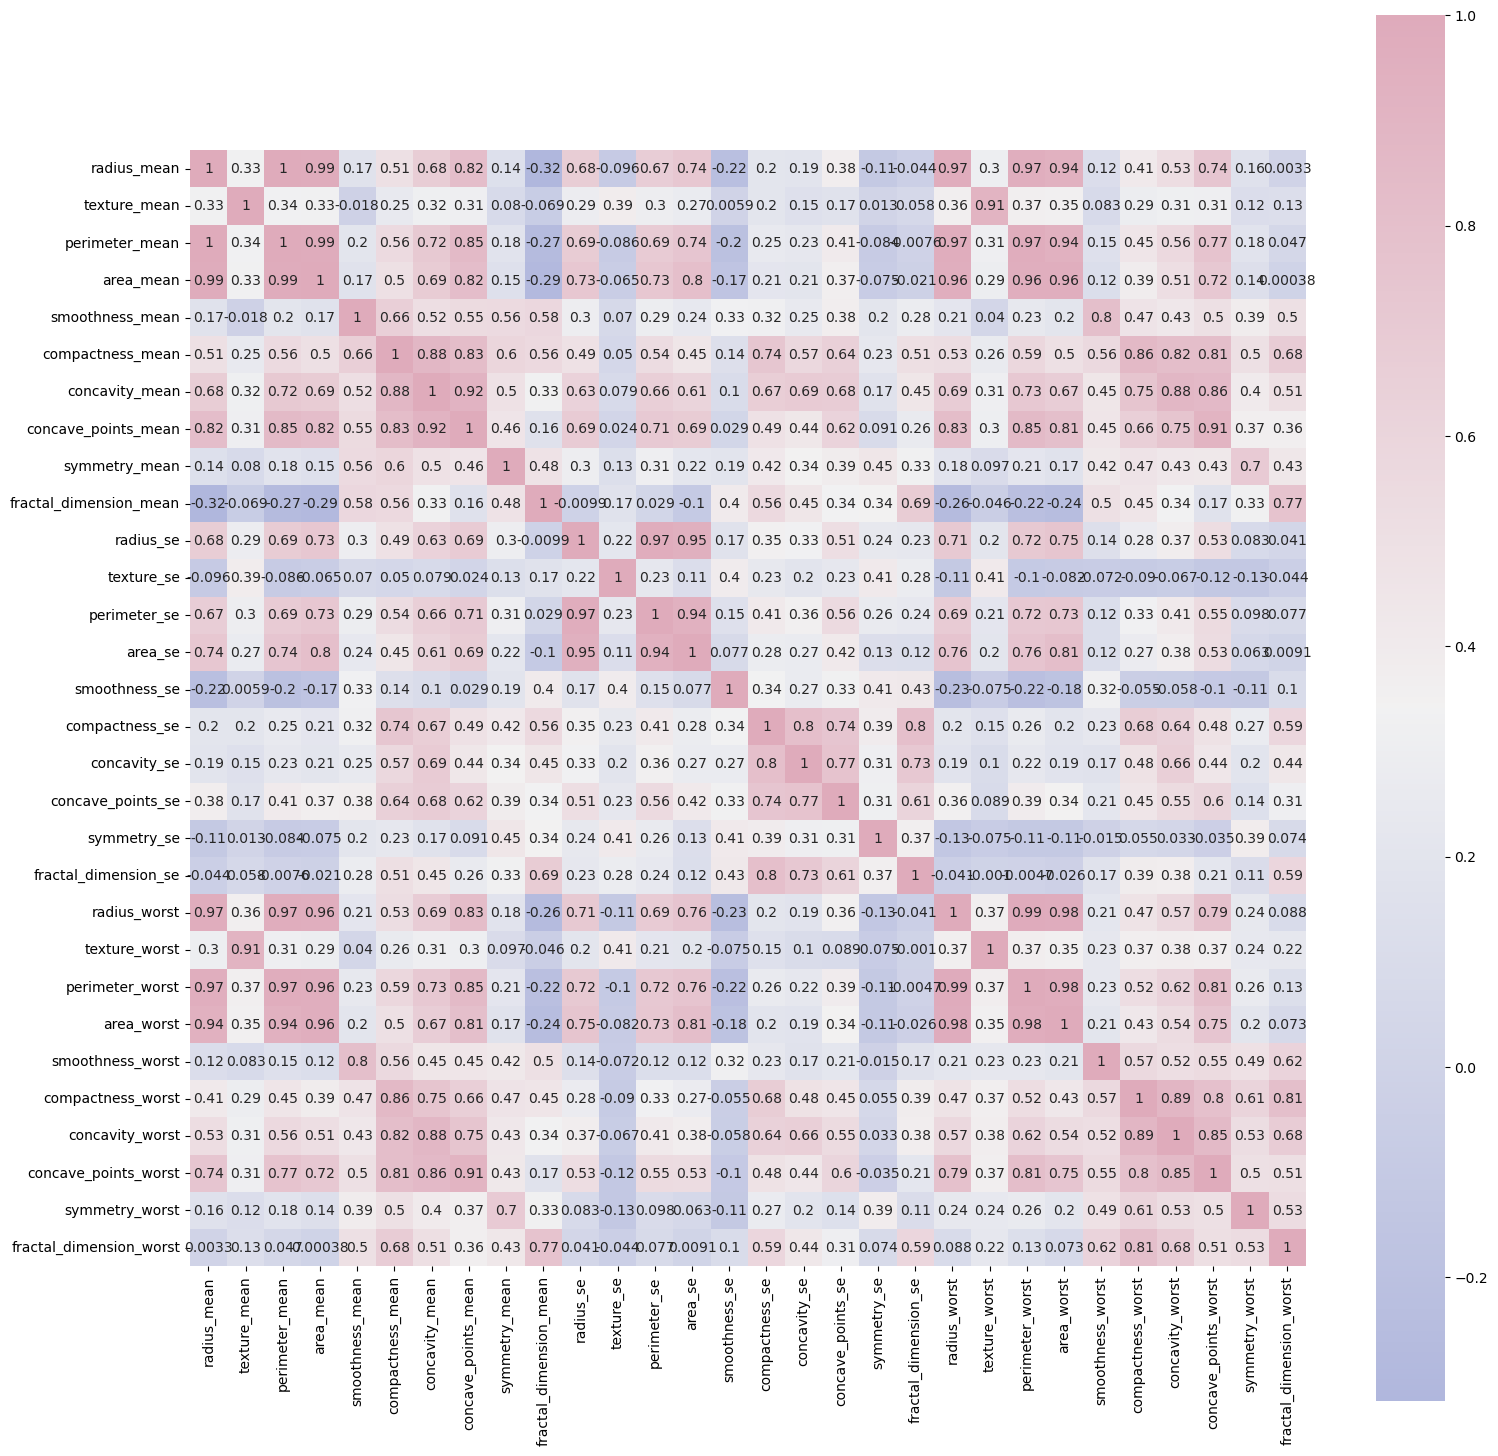

In [ ]:
cmap=sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(df_features.corr(), cmap=cmap, annot=True, square=True)
plt.show()

- From the heat map, we can see several groups of features that are strongly correlated with each other:
    - radius_mean, perimeter_mean and area_mean. *(which makes sense because area = radius^2 * pi, and perimeter = 2 * pi * radius)*
    - radius_se, perimeter_se and area_se.
    - radius_worst, perimeter_worst and area_worst.
    - compactness_mean, concavity_mean and concave_points_mean.
    - compactness_se, concavity_se and concave_points_se.
    - compactness_worst, concavity_worst and concave_points_worst.
    - texture_mean and texture_worst.
    - area_mean and area_worst.
    - concavity_mean and concavity_worst.
- Because these features are highly correlated, it's sufficient to choose just one feature from each group. I'll be using:
    - area_mean.
    - area_se.
    - *area_worst.*
    - concavity_mean.
    - concavity_se.
    - *concavity_worst.*
    - texture_mean.
    - area_mean. *(already using it)*
    - concavity_mean. *(already using it)*

In [10]:
equivalent_features = ['radius_mean', 'perimeter_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'compactness_mean',
                                            'concave_points_mean', 'compactness_se', 'concave_points_se', 'compactness_worst', 'concave_points_worst',
                                            'texture_worst', 'area_worst', 'concavity_worst']

df_new_features = df_features.drop(columns= equivalent_features, axis= 1)
df_new = df.drop(columns= equivalent_features, axis= 1)

columns_mean = [x for x in columns_mean if x not in equivalent_features]
columns_se = [x for x in columns_se if x not in equivalent_features]
colmuns_worst = [x for x in colmuns_worst if x not in equivalent_features]
print(colmuns_worst)
df_new_features.corr()

['smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
texture_mean,1.000000,0.326193,-0.017769,0.315248,0.080146,-0.068771,0.385865,0.271431,0.005855,0.146559,0.013387,0.058030,0.082714,0.116263,0.127177
area_mean,0.326193,1.000000,0.174838,0.686232,0.148219,-0.288560,-0.065375,0.800829,-0.166555,0.206677,-0.074638,-0.021493,0.121543,0.139856,0.000382
smoothness_mean,-0.017769,0.174838,1.000000,0.519002,0.555259,0.582435,0.070139,0.241523,0.333703,0.247046,0.198262,0.281917,0.804667,0.390161,0.496684
concavity_mean,0.315248,0.686232,0.519002,1.000000,0.495525,0.329768,0.079374,0.612945,0.100190,0.692510,0.173926,0.448172,0.446155,0.401782,0.510736
symmetry_mean,0.080146,0.148219,0.555259,0.495525,1.000000,0.475301,0.130864,0.216374,0.188984,0.341438,0.447109,0.329914,0.424045,0.696745,0.434165
fractal_dimension_mean,-0.068771,-0.288560,0.582435,0.329768,0.475301,1.000000,0.167216,-0.101053,0.404647,0.445962,0.342378,0.688115,0.502760,0.326735,0.765562
texture_se,0.385865,-0.065375,0.070139,0.079374,0.130864,0.167216,1.000000,0.114701,0.397158,0.195864,0.413361,0.280908,-0.072486,-0.126357,-0.043884
area_se,0.271431,0.800829,0.241523,0.612945,0.216374,-0.101053,0.114701,1.000000,0.076509,0.269319,0.129938,0.123864,0.120501,0.062841,0.009136
smoothness_se,0.005855,-0.166555,0.333703,0.100190,0.188984,0.404647,0.397158,0.076509,1.000000,0.269093,0.414437,0.428043,0.315438,-0.107025,0.102554
concavity_se,0.146559,0.206677,0.247046,0.692510,0.341438,0.445962,0.195864,0.269319,0.269093,1.000000,0.308465,0.727078,0.167143,0.195679,0.438513


In [ ]:
df_new.head()

,Diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
1,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
2,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
3,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678
4,M,15.70,477.1,0.12780,0.1578,0.2087,0.07613,0.8902,27.19,0.007510,0.03672,0.02165,0.005082,0.1791,0.3985,0.12440


In [ ]:
df_new_features.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
1,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
2,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
3,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678
4,15.70,477.1,0.12780,0.1578,0.2087,0.07613,0.8902,27.19,0.007510,0.03672,0.02165,0.005082,0.1791,0.3985,0.12440


- We can see that the data is quite imbalanced.

<Axes: >

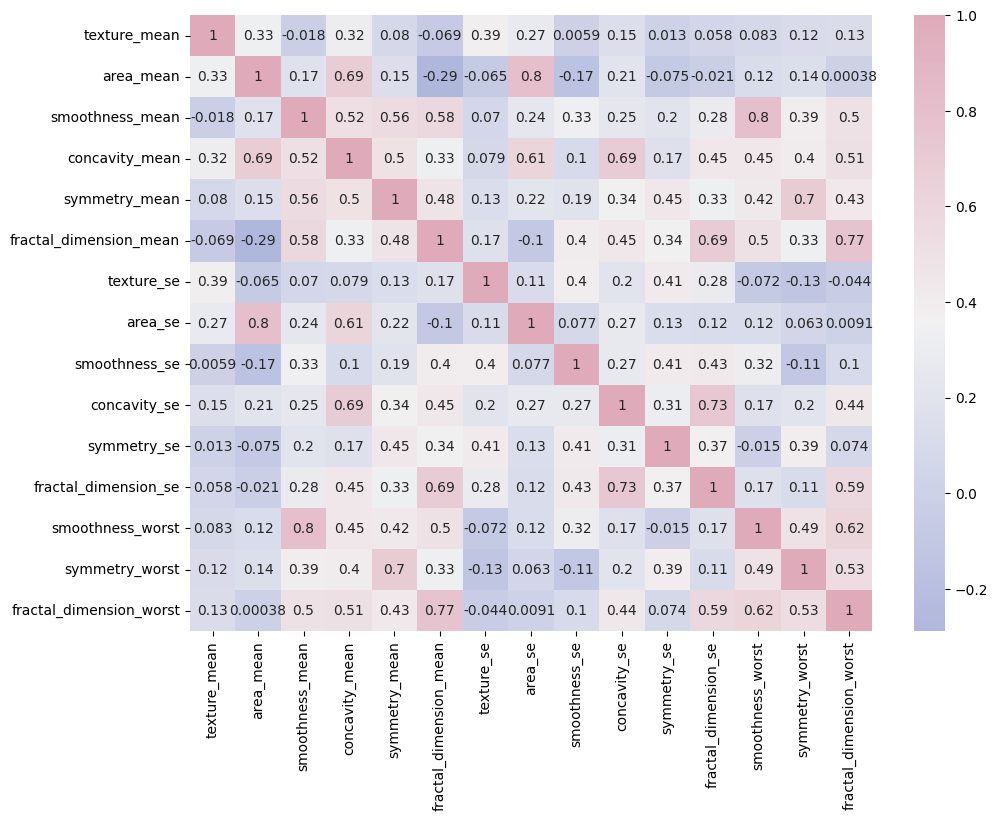

In [ ]:
plt.subplots(figsize= (11,8))
sns.heatmap(df_new_features.corr(),cmap= cmap, annot=True)

<Axes: xlabel='Diagnosis', ylabel='count'>

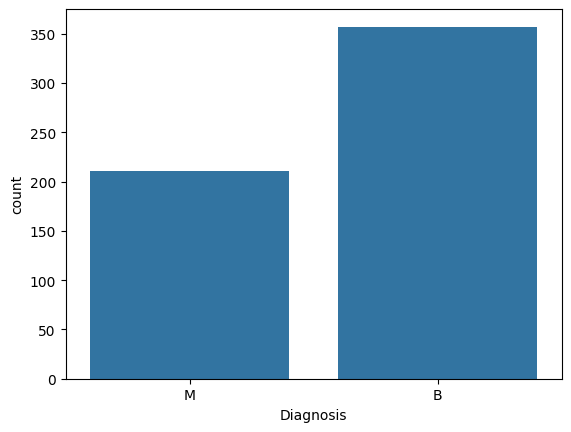

In [ ]:
sns.countplot(df[['Diagnosis']], x='Diagnosis')

In [ ]:
df_new.head()

,Diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
1,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
2,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
3,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678
4,M,15.70,477.1,0.12780,0.1578,0.2087,0.07613,0.8902,27.19,0.007510,0.03672,0.02165,0.005082,0.1791,0.3985,0.12440


- Now let's visualize the data using histograms to analyze the distribution of each feature when the tumor is malignant. This will help us identify the most frequent values and gain insights into patterns specific to malignant cases.

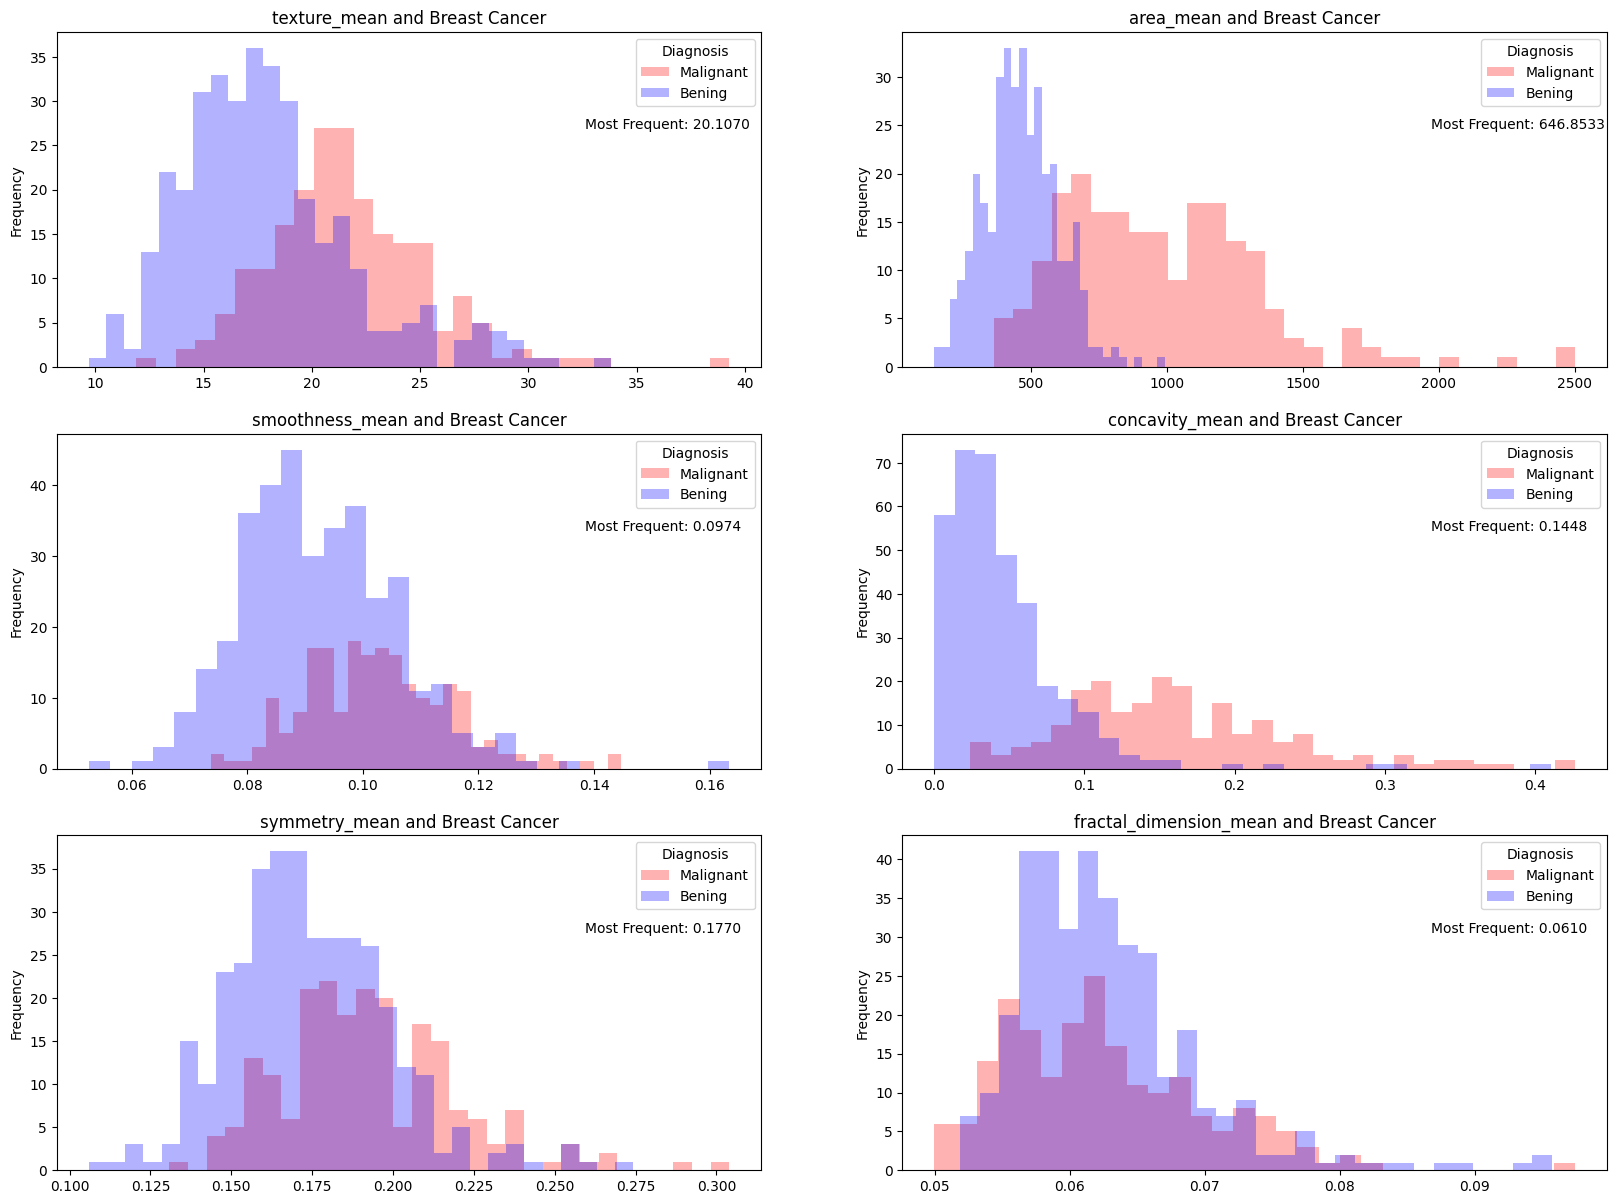

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_mean, 1):
    if column=='Diagnosis':
        continue
    plt.subplot((len(columns_mean) + 2) // 2, 2, i)
    m = plt.hist(df_new[df_new["Diagnosis"] == "M"][column], bins=30, fc = (1,0,0,0.3), label = "Malignant")
    b = plt.hist(df_new[df_new["Diagnosis"] == "B"][column], bins=30, fc = (0,0,1,0.3), label = "Bening")
    plt.title(f'{column} and Breast Cancer')
    plt.ylabel('Frequency')
    plt.legend(title='Diagnosis', loc='upper right')
    max_frequent = m[0].max()
    index_frequent = list(m[0]).index(max_frequent)
    most_frequent = m[1][index_frequent]
    plt.text(0.75, 0.71, f'Most Frequent: {most_frequent:.4f}', transform=plt.gca().transAxes)

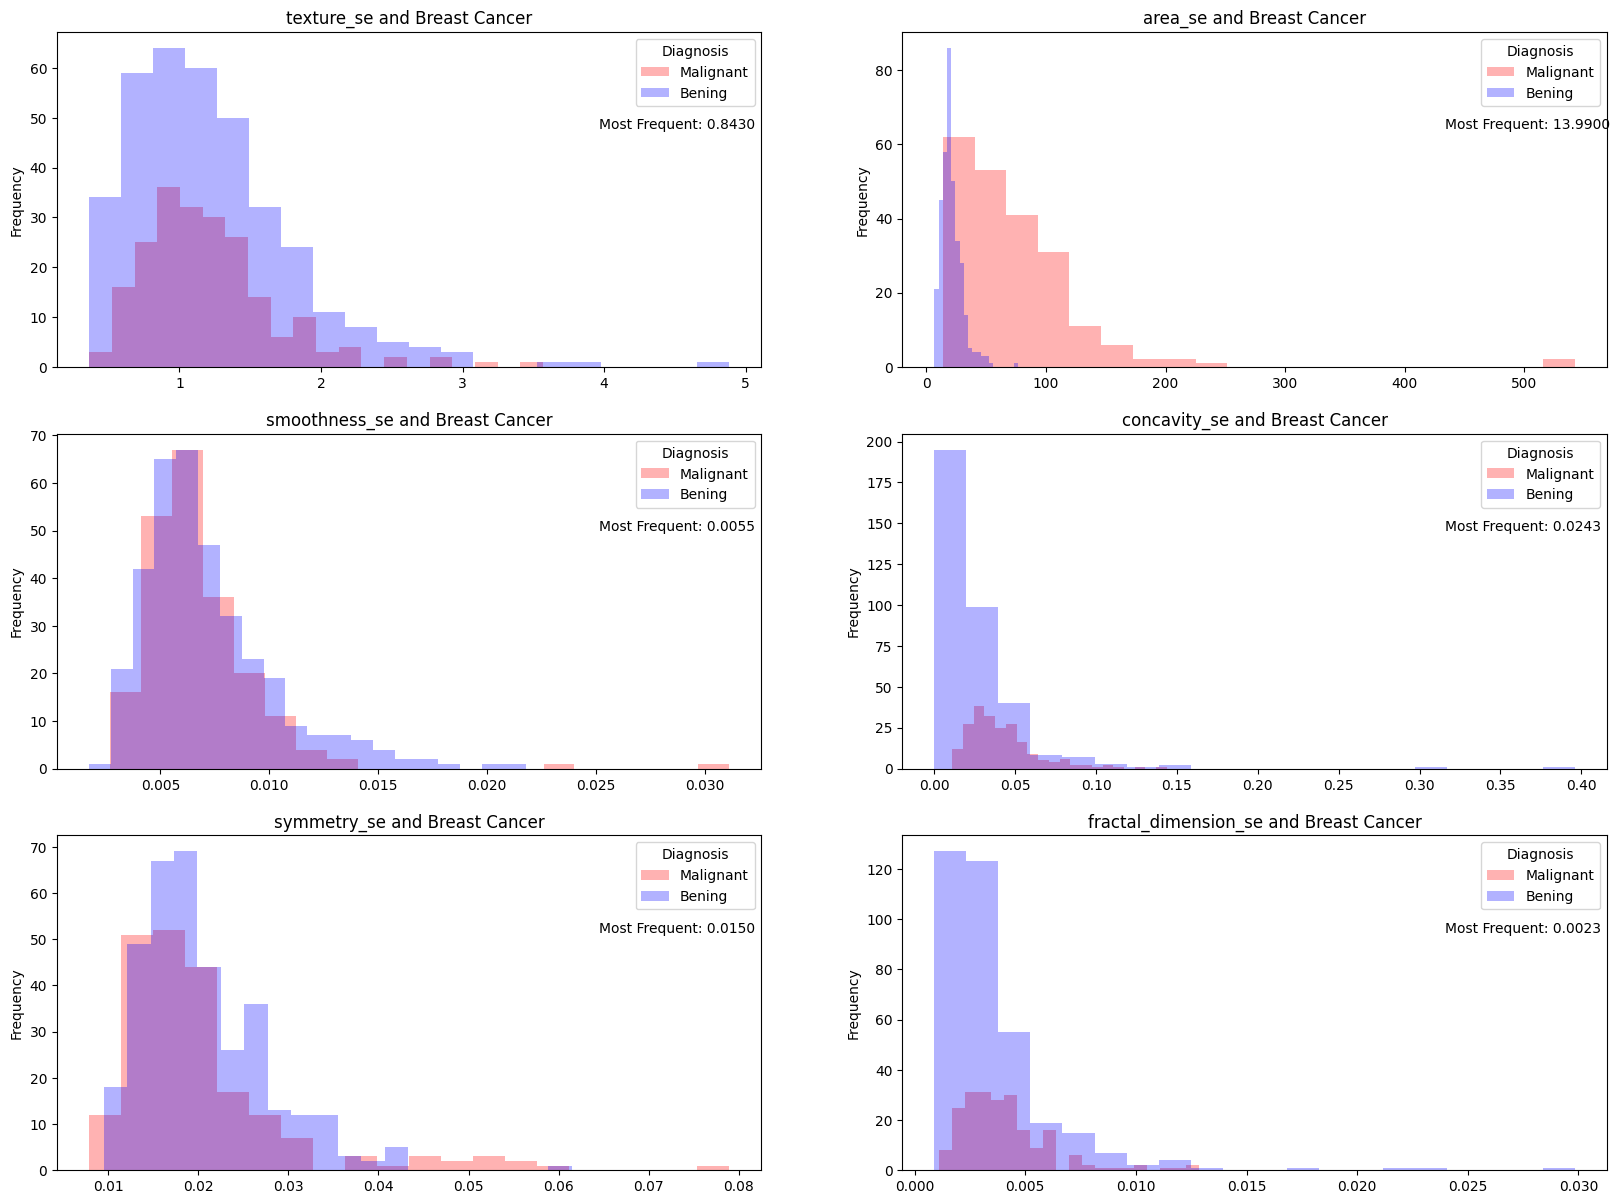

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_se, 1):
    if column=='Diagnosis':
        continue
    plt.subplot((len(columns_se) + 2) // 2, 2, i)
    m = plt.hist(df_new[df_new["Diagnosis"] == "M"][column], bins=20, fc = (1,0,0,0.3), label = "Malignant")
    b = plt.hist(df_new[df_new["Diagnosis"] == "B"][column], bins=20, fc = (0,0,1,0.3), label = "Bening")
    plt.title(f'{column} and Breast Cancer')
    plt.ylabel('Frequency')
    plt.legend(title='Diagnosis', loc='upper right')
    max_frequent = m[0].max()
    index_frequent = list(m[0]).index(max_frequent)
    most_frequent = m[1][index_frequent]
    plt.text(0.77, 0.71, f'Most Frequent: {most_frequent:.4f}', transform=plt.gca().transAxes)

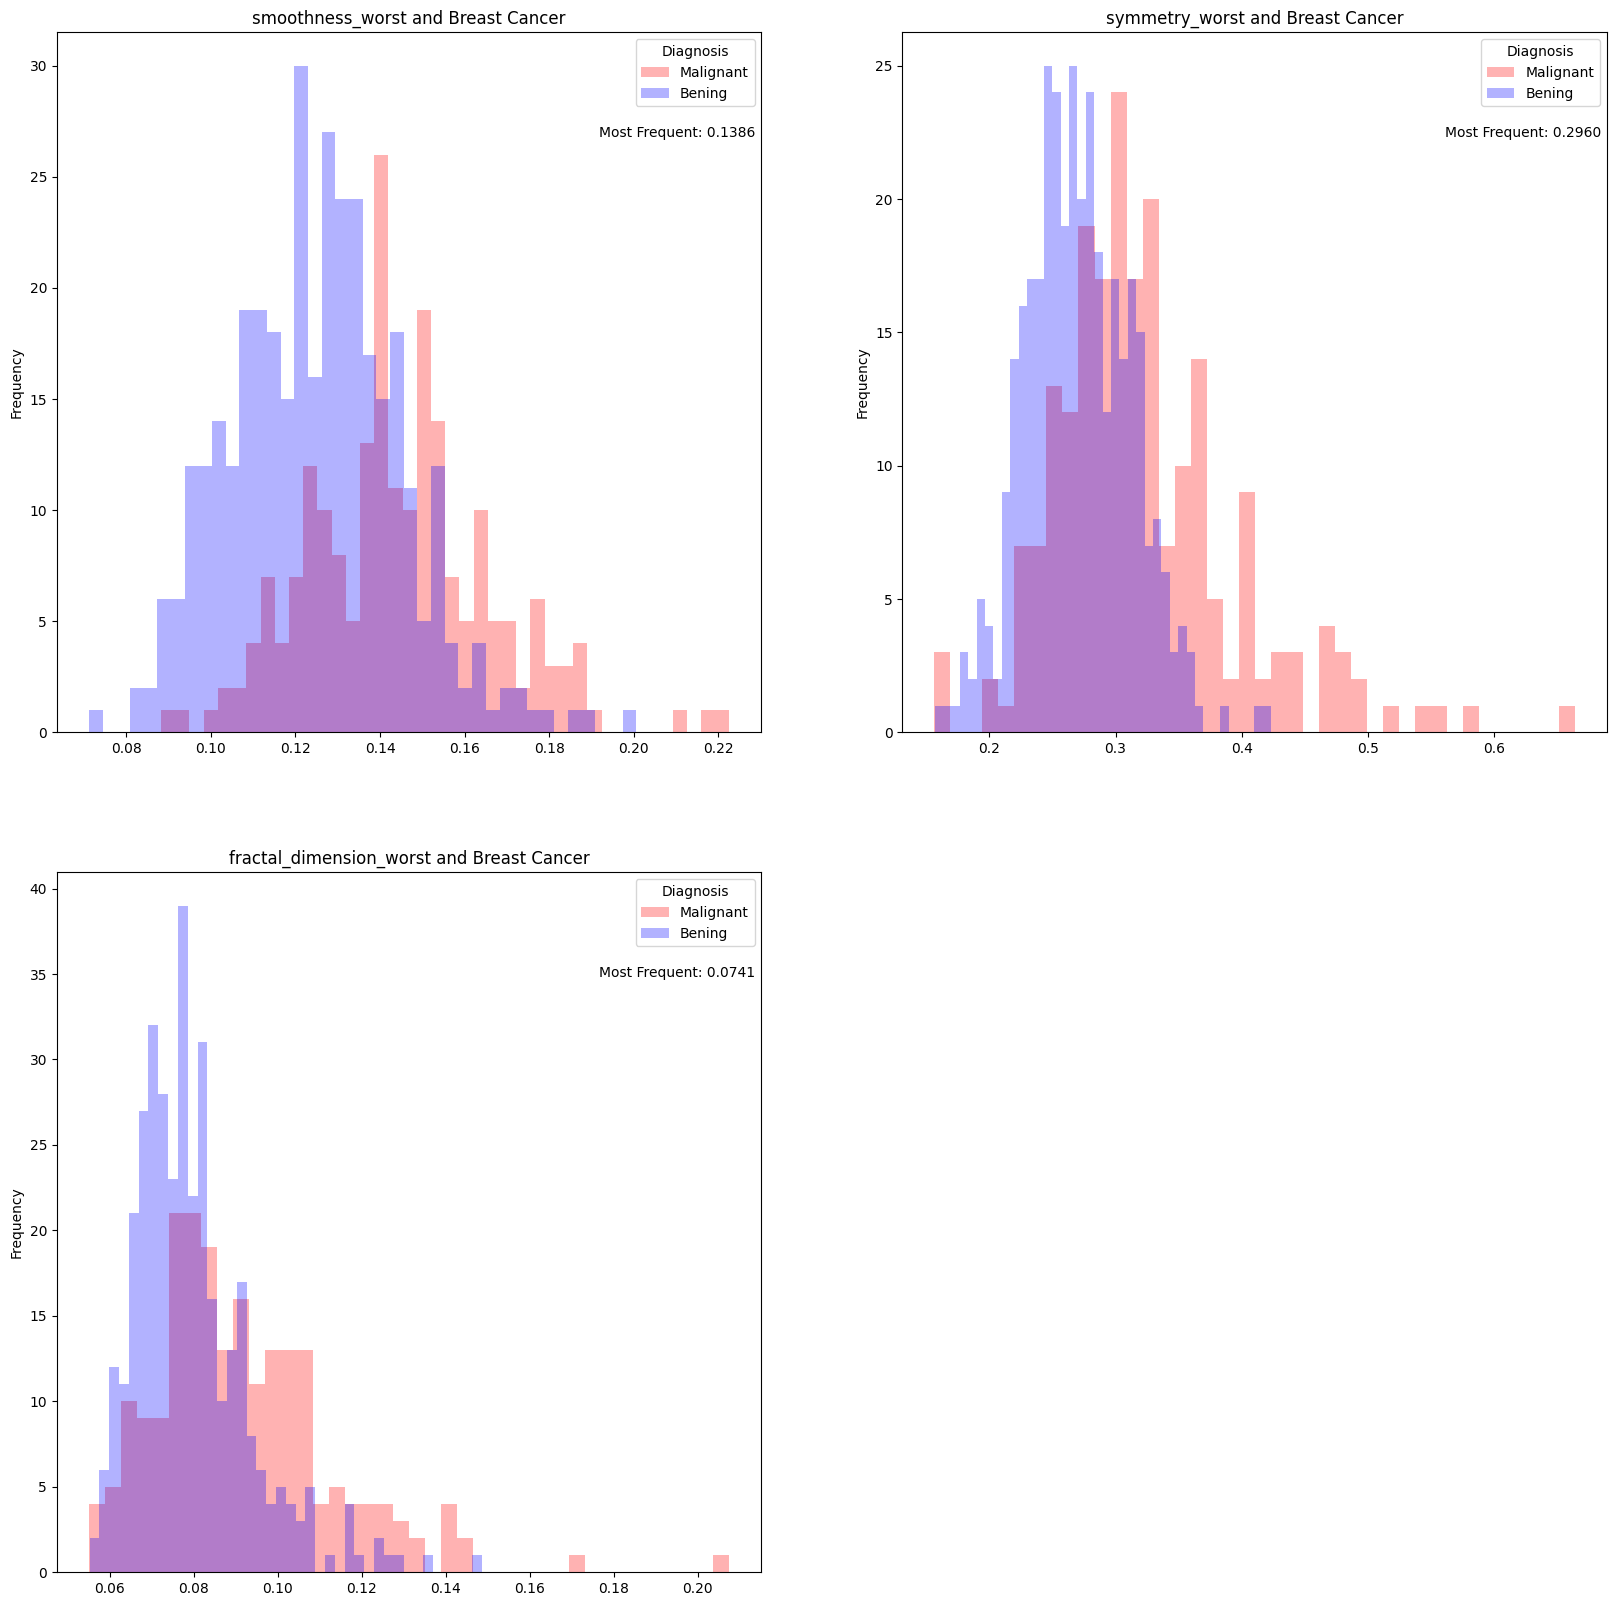

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(colmuns_worst, 1):
    if column=='Diagnosis':
        continue
    plt.subplot((len(colmuns_worst) + 2) // 2, 2, i)
    m = plt.hist(df_new[df_new["Diagnosis"] == "M"][column], bins=40, fc = (1,0,0,0.3), label = "Malignant")
    b = plt.hist(df_new[df_new["Diagnosis"] == "B"][column], bins=40, fc = (0,0,1,0.3), label = "Bening")
    plt.title(f'{column} and Breast Cancer')
    plt.ylabel('Frequency')
    plt.legend(title='Diagnosis', loc='upper right')
    max_frequent = m[0].max()
    index_frequent = list(m[0]).index(max_frequent)
    most_frequent = m[1][index_frequent]
    plt.text(0.77, 0.85, f'Most Frequent: {most_frequent:.4f}', transform=plt.gca().transAxes)

## Outliers Detection

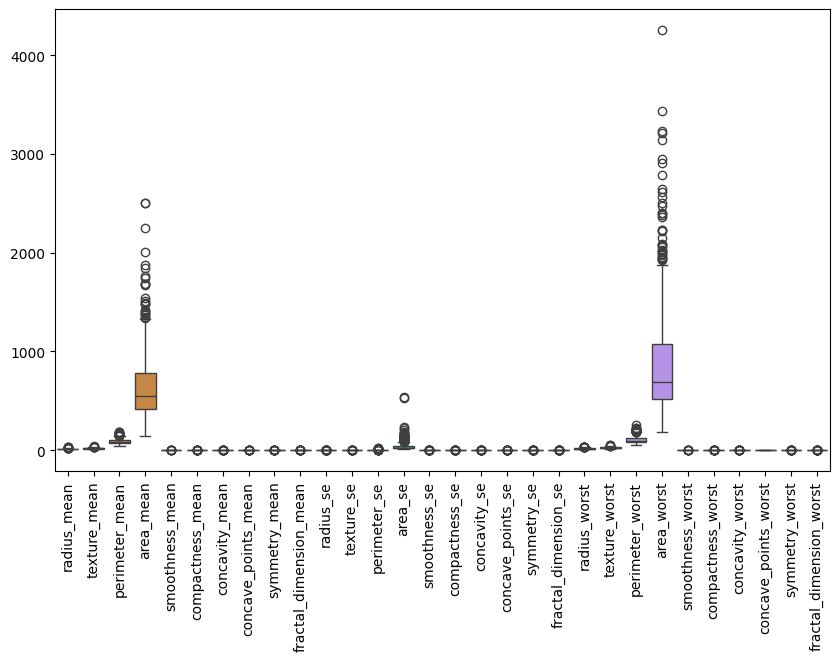

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for all numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

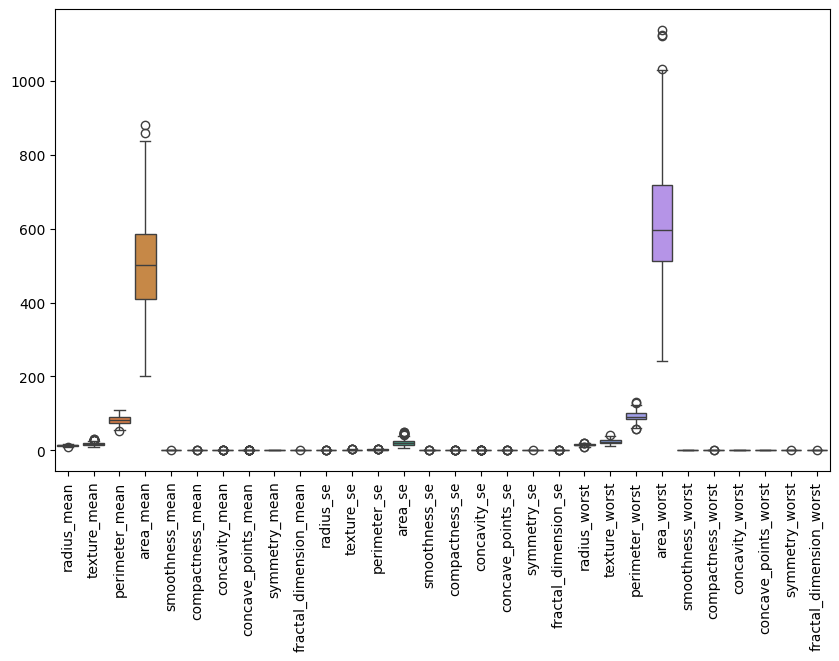

In [11]:
def remove_outliers_iqr(df):
    # For each numerical column
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter rows that are within the IQR range
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the dataset
df_cleaned_iqr = remove_outliers_iqr(df)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned_iqr)
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

In [ ]:
df_cleaned_iqr.shape

(275, 31)

In [ ]:
def percentage_outliers_iqr(df):
    total_rows = df.shape[0]
    outlier_rows = pd.DataFrame(index=df.index)  # Empty DataFrame to track outlier rows

    # For each numerical column, flag rows as outliers
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Mark outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_rows[column] = outliers

    # Count rows that have any outliers
    num_outlier_rows = outlier_rows.any(axis=1).sum()
    percentage_outliers = (num_outlier_rows / total_rows) * 100

    print(f"Percentage of outliers: {percentage_outliers:.2f}%")
    return percentage_outliers

# Check percentage of outliers in the dataset
percentage_outliers_iqr(df)

Percentage of outliers: 30.11%


30.1056338028169

### Splitting Outliers from the Data

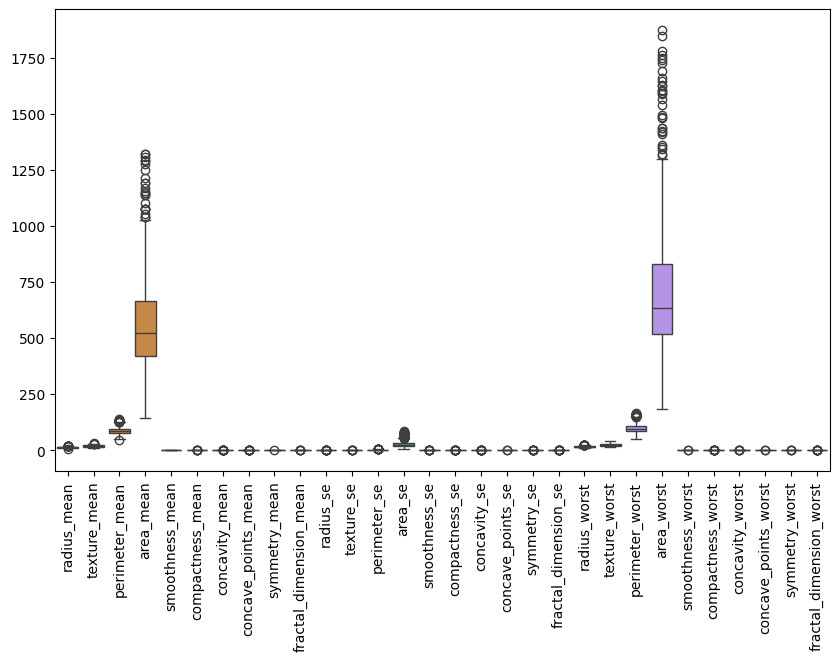

In [ ]:
def split_outliers_iqr(df):
    outliers_df = pd.DataFrame(index=df.index)  # Empty DataFrame to store outliers
    clean_data = df.copy()  # Create a copy of the DataFrame for clean data

    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Flag outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        outliers_df[column] = df[column].where(outliers)
        clean_data[column] = df[column].where(~outliers)  # Keep only non-outliers in clean data

    outliers_df = outliers_df.dropna(how='all')  # Remove rows without any outliers
    clean_data = clean_data.dropna()  # Remove rows containing outliers

    return clean_data, outliers_df

# Split data into clean data and outliers
clean_data_iqr, outliers_iqr = split_outliers_iqr(df)

In [ ]:
# clean_data_iqr this is data without outliers
# df_new_features this is data without target
# df_new this is data
# df_target this is the target
df_target

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
563,M
564,M
565,M
566,M


In [ ]:
df_cleaned_iqr.shape

(275, 31)

In [12]:
# label encoding
df_cleaned_iqr['Diagnosis']=df_cleaned_iqr['Diagnosis'].map({'B':0,'M':1})

In [13]:
# splitting data into target and features
y = df_cleaned_iqr[['Diagnosis']]
x = df_cleaned_iqr.drop(columns=['Diagnosis'], axis= 1)

In [14]:
# solving imbalance problem by generating new data from the original
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
x_resampled, y_resampled = adasyn.fit_resample(x,y)

<Axes: xlabel='Diagnosis', ylabel='count'>

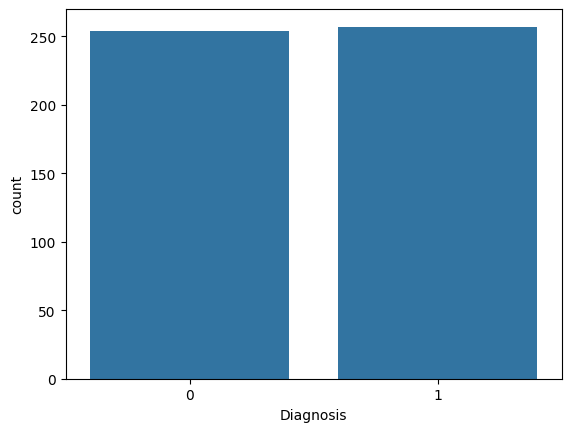

In [15]:
sns.countplot(y_resampled[['Diagnosis']], x='Diagnosis')

In [16]:
x_resampled.shape

(511, 30)

In [ ]:
x_resampled.duplicated().sum()

0

In [ ]:
x_resampled.isnull().sum()

,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0
symmetry_mean,0
fractal_dimension_mean,0


In [17]:
# splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# **logistic regression model on data without outliers**

In [18]:
lr_model = Pipeline([('scaler', StandardScaler()),('log_reg', LogisticRegression())])
lr_model.fit(x_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [19]:
y_pred = lr_model.predict(x_test)

In [20]:
# testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9805825242718447


In [21]:
y_pred = lr_model.predict(x_train)

In [22]:
# training accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9926470588235294


# **SVM model**

In [23]:
from sklearn.svm import SVC
svm_model = Pipeline([('scaler', StandardScaler()),('svm', SVC(kernel='rbf', C=1.0, random_state=42))])

svm_model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

In [24]:
y_pred = svm_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy}")

Testing Accuracy: 0.9805825242718447


In [25]:
y_pred = svm_model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 0.9950980392156863


# **decision tree model**

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = Pipeline([('scaler', StandardScaler()),('decision_tree', DecisionTreeClassifier(max_depth=7, random_state=42))])
dt_model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=7, random_state=42))])

In [27]:
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy}")


Testing Accuracy: 0.9611650485436893


In [28]:
y_pred = dt_model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 1.0


In [32]:
import joblib

joblib.dump(lr_model, 'cancer_lr_model.pkl')
saved_model = joblib.load('cancer_lr_model.pkl')